In [1]:
import numpy as np 

from scipy.integrate import solve_ivp

import pde

import matplotlib as mpl
import matplotlib.pyplot as plt 

from haar import haar as haar1

from haar import haar
from pi2 import pi2 
from pi1 import pi1


mpl.style.use('seaborn')

In [2]:
def wavelet_solve(J, n): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1e-6
    gradepstol = 1e-3
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in range(N): 
            W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [4]:
from scipy.special import airy

def exactairynl(m, n, x): 
    ai1, aip1, bi1, bip1 = airy(- n / (2* m * n)**(2/3))
    ai2, aip2, bi2, bip2 = airy(n * (m * x - 1) / (2* m * n)**(2/3))

    return 2**(2/3) * m / (m * n) ** (2/3) * ((aip1 * bip2) - bip1*aip2) / (aip1*bi2 - bip1*ai2)

def exactnl(n, x): 
    return - np.sqrt(2/n) * np.tan(np.sqrt(n/2) * x)


In [84]:
from scipy import integrate

def integratornl1param(n, x): 
    def _integrator(t, Y): 
        return [Y[1], -n * Y[0] * Y[1]]
    
    return integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], y0=[0, -1], t_eval=x).y[0, :] # , method='Radau'

In [52]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

4.392741218999771
25.08967087032782
124.72245209497473
414.44997242734996
815.1110521113864
1255.3176139877037
1424.713043009005
1199.9348134800666
808.275812829701
462.1340831207908
234.36840413013306
108.80160870322106
47.29076519224054
19.56533547235904
7.800833895711548
3.0258151815996825
1.1501407184832715
0.4308140583434579
0.15969618138660735
0.058766561150150665
0.021517468716410804
0.00785208443448937
0.0028589321718754945
0.0010393953689344926
0.00037753767537651584
0.00013705206038139295
4.9739911446522456e-05
1.8045917386189103e-05
6.537467015732545e-06
2.374601535848342e-06
8.674287528265268e-07


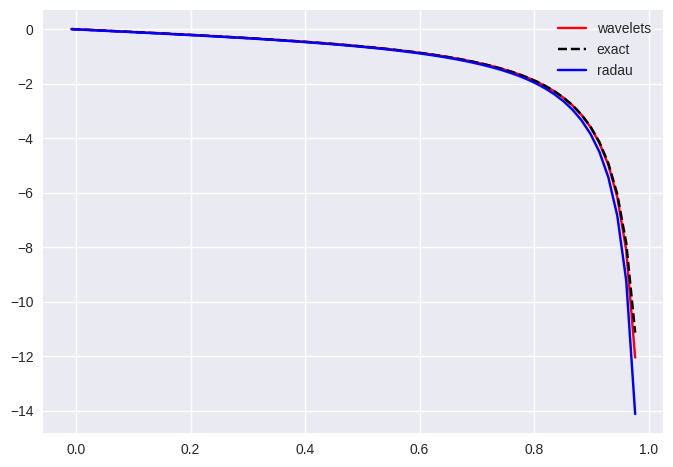

In [85]:
m = 1
n = 4.8
stest, stestx = wavelet_solve(5, n)
#exacteval  = exactairynl(m, -n, stestx)
exacteval = exactnl(n, stestx)
spysoln = integratornl1param(n, stestx)
plt.plot(stestx, stest, 'r', label='wavelets')
plt.plot(stestx, exacteval, 'k--', label="exact")
plt.plot(stestx, spysoln, 'b-', label='radau')
plt.legend()

In [90]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.12026511975610966 0.43415667618292964


In [51]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.0017361380003599726 0.04464027669441276


In [47]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.016459583294324596 0.13910942474151283


In [18]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.12026511975610966 0.42785356315606676


2.3636563598427793
4.143778599023666
3.9022659286200927
1.7540562245312445
0.5574947466372997
0.13196312988496395
0.02521019260396784
0.004054801633110117
0.0005643056538033875
7.256705318070544e-05
8.442320887702692e-06
8.868996497213288e-07
2.5650479222837497
5.163904350606846
5.867998678447311
3.1898223317853596
1.168085188713766
0.3149947132880637
0.06836709240786476
0.012493813035520773
0.002003545427530895
0.0002968018346720669
3.9251196207956696e-05
4.690474437296643e-06
5.115093237861856e-07
2.772543122214386
6.391799677033285
8.758701904215583
5.7975079166744425
2.4556655393295586
0.7542849230300384
0.18550326598090194
0.03837950024045256
0.00722248619056387
0.0012104320867702967
0.0001812452961207356
2.454107258031968e-05
3.0344311241492505e-06
3.454312533790471e-07
2.9862596985452785
7.864582589571961
13.001830674281617
10.574615646084847
5.2222699798440715
1.8337137763177225
0.5111120647688523
0.12374587246721802
0.026589670613805794
0.005029769708244203
0.00085072704256816

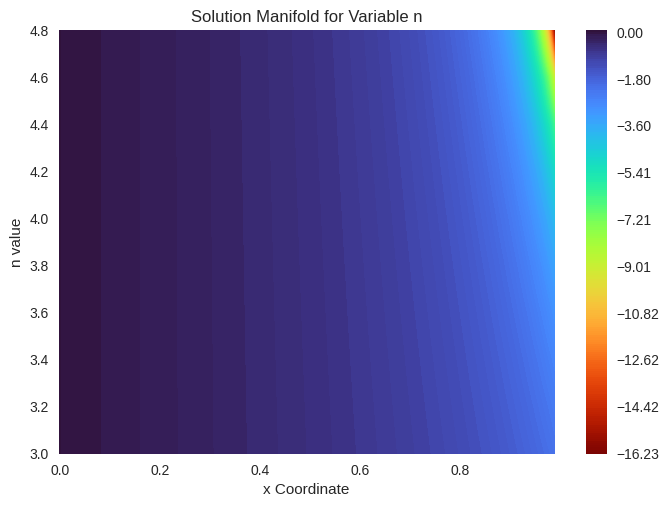

In [102]:
#%matplotlib widget
from matplotlib import cm

#xs = np.linspace(0, 1, 100) 
J = 6
N = 2**(J + 1) 
j = np.arange(0, N)
xs = (j - 0.5) / N

ns = np.linspace(3, 4.8, 10)

X, N = np.meshgrid(xs, ns)
evals = []
evals_lib = []
evals_wavelets = []

for n in ns: 
    evals.append(exactnl(n, xs))
    evals_lib.append(integratornl1param(n, xs))
    evals_wavelets.append(wavelet_solve(J, n)[0])

evals = np.array(evals)
evals_lib = np.array(evals_lib)
evals_wavelets = np.array(evals_wavelets)
#evals.shape, X.shape, N.shape
#fig, ax = plt.subplots(subplot_kw = dict(projection="3d"), constrained_layout=1)
fig1, ax2 = plt.subplots()

#ax.plot_surface(X, N, evals)
cs = ax2.contourf(X, N, evals, 250, cmap=cm.turbo_r)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Solution Manifold for Variable n")
v1 = np.linspace(evals.min(), evals.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)

In [55]:
evals.shape, evals_lib.shape

((50, 100), (50, 100))

In [53]:

L2evals = L2_error(evals, evals_lib)

In [94]:
N.shape, X.shape

((50, 100), (50, 100))

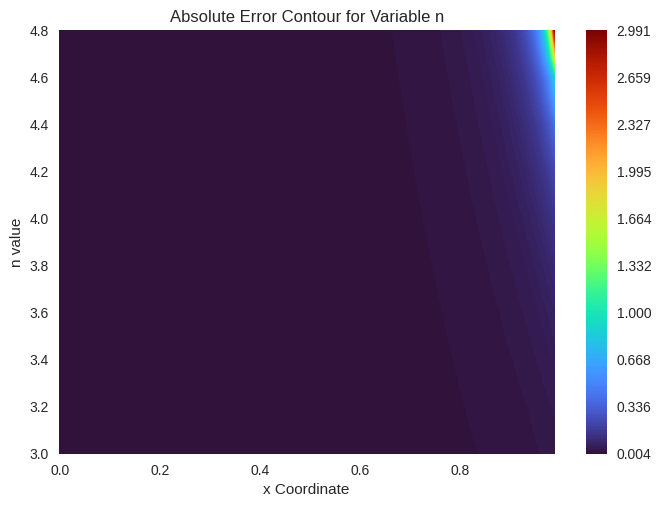

In [104]:
fig2, ax3 = plt.subplots()
abserr =  (np.abs(evals - evals_lib))
#ax.plot_surface(X, N, evals)
cs = ax3.contourf(X, N, abserr, 1000, cmap=cm.turbo)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Absolute Error Contour for Variable n")
v1 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)


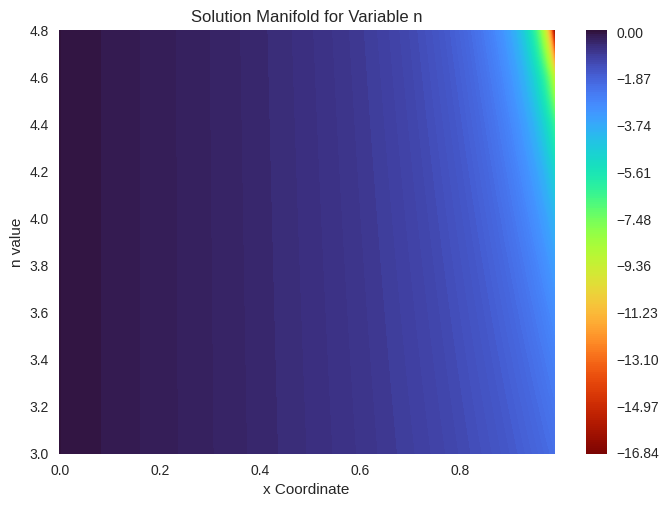

In [103]:
fig3, ax4 = plt.subplots()

#ax.plot_surface(X, N, evals)
cs = ax4.contourf(X, N, evals_wavelets, 250, cmap=cm.turbo_r)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Solution Manifold for Variable n")
v1 = np.linspace(evals_wavelets.min(), evals_wavelets.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)

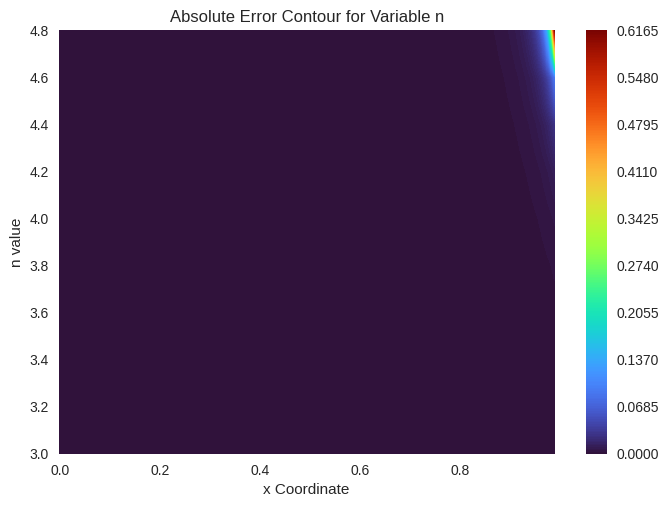

In [105]:
fig4, ax5 = plt.subplots()
abserr =  (np.abs(evals - evals_wavelets))
#ax.plot_surface(X, N, evals)
cs = ax5.contourf(X, N, abserr, 1000, cmap=cm.turbo)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Absolute Error Contour for Variable n")
v1 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)


Text(0.5, 1.0, 'Collocation Points for 3 Levels of Refinement')

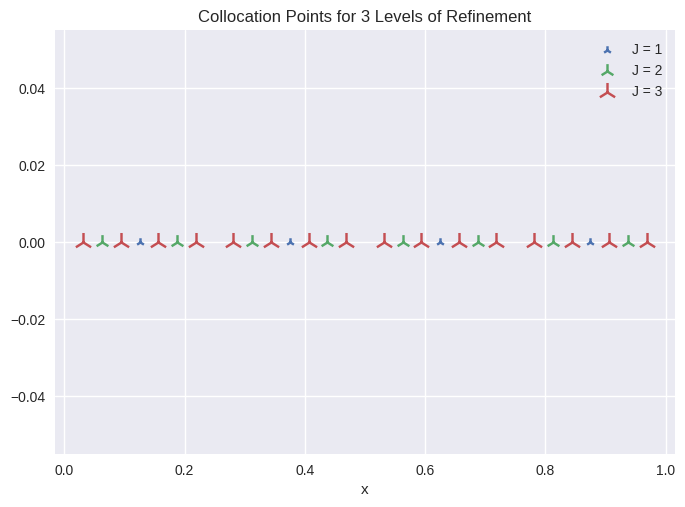

In [23]:
J = 1
for J in range(1, 4): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j + 0.5) / N
    plt.scatter(x, np.zeros(x.shape), (J-1/2)*75, marker="2", label=f'J = {J}')

plt.legend()
plt.xlabel("x")
plt.title("Collocation Points for 3 Levels of Refinement")

  0%|          | 0/10.0 [00:00<?, ?it/s]

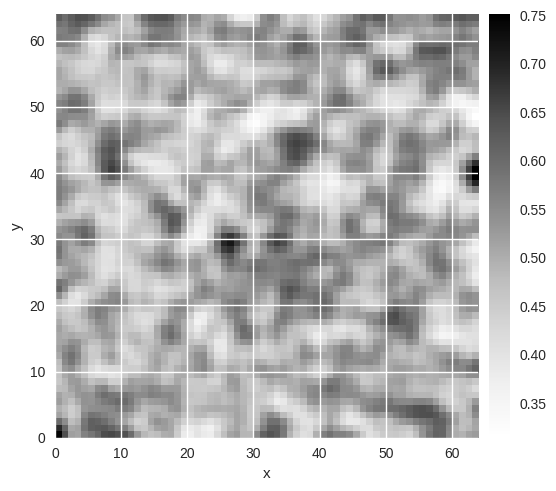

In [2]:
grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=10)          # solve the pde
result.plot()                                 # plot the resulting field

In [ ]:
eq = pde.PDE({'c' : ''})

In [49]:
import numpy as np

def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    #y = np.zeros([1, len(x)])
    y = np.zeros([len(x), 1])


    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j, 0] = 1 
                #y[0, j] = 1
            else:
                y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        print(f'a: {alpha}\n')
        print(f'b: {beta}\n')
        print(f'g: {gamma}\n')
        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j, 0] = 1 
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j, 0] = 0
                #y[0, j] = 0

    return y

In [4]:
def pi1(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1 

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j):
                ind_s +=1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j+1

        m, k = np.where(IMask == i) 
        m = 2**m 

    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = x[i]
            else: 
                y[0, i] = 0 

    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = x[i] - alpha 
            elif beta <= x[i] < gamma: 
                y[0, i] = gamma - x[i]
            else: 
                y[0, i] = 0 

    return y

In [5]:
def pi2(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j): 
                ind_s += 1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        m, k = np.where(IMask == i) 
        m = 2**m 


    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = 0.5 * x[i]**2 
            else: 
                y[0, i] = 0 
    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = 0.5 * (x[i] - alpha)**2 
            elif beta <= x[i] < gamma: 
                y[0, i] = 1 / (4 * m**2) - 0.5 * (gamma - x[i]) ** 2 
            elif gamma <= x[i] < 1 : 
                y[0, i] = 1 / (4 * m**2) 
            else: 
                y[0, i] = 0


    return y 

In [56]:
def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    
    #y = np.zeros([1, len(x)])
    y = np.zeros((len(x), ))
    

    # TODO: vectorize setting these 
    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m

        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j] = -1
                #y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0

    return y #, m, k

In [50]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar1(x, 1, J).shape

(1, 16)

In [42]:
x.shape

(16,)

In [57]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar(x, 3, J).shape

(16,)

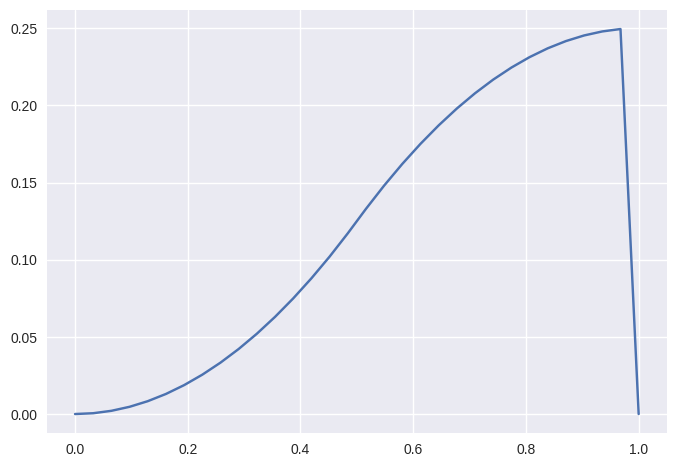

In [6]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi2(x, i, J)

plt.plot(x, y.ravel())

In [22]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = haar(x, i, J)

plt.plot(x, y.ravel())

[0.] [0.5] [1.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
y.ravel()

array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 0.        ])

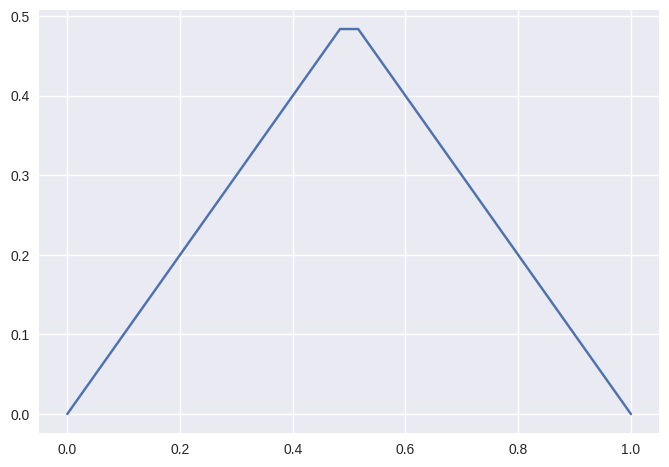

In [23]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi1(x, i, J)

plt.plot(x, y.ravel())

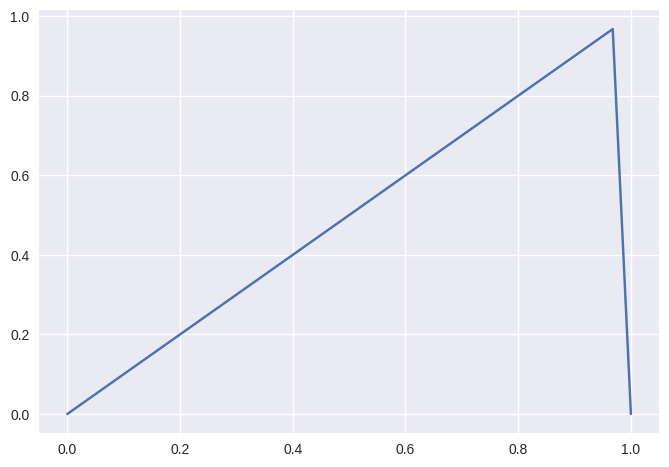

In [10]:
x = np.linspace(0, 1, 32)
J = 4 
i = 1

y = pi1(x, i, J)

plt.plot(x, y.ravel())

In [11]:
pi1([0.5], 1, 3)

array([[0.5]])

In [12]:
pi1([0.99], 2, 6)

array([[0.01]])

In [13]:
pi1([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

array([[0., 0., 0., 0., 0.]])

In [14]:
haar([0.99], 2, 6) # + 

a: [0.]

b: [0.5]

g: [1.]



array([[-1.]])

In [15]:
haar([0.5], 1, 3) # + 

array([[1.]])

In [16]:
haar([0.1], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0.]])

In [17]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0., 1., 0., 0., 0.]])

In [18]:
def haar(x, i, J): 
    if i == 1:  
        m = k = 0 
    else: 
        IMat = np.zeros((J+1, 2**J))
        IMask = IMat 

        ind_s = 1
        for ind_j in range(0, J): 
            for ind_i in range(0, 2**ind_j): 
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s 
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        (ind_j, ind_i) = np.where(IMask == i)
        m = 2**(ind_j - 1) 
        k = ind_i 

    y = 0

    if i == 1: 
        #for i in range(len(x)): 
        if 0 <= x < 1: 
            y = 1 
        else: 
            y = 0 

    else: 
        alpha = k / m 
        beta = (k + 0.5) / m 
        gamma = (k + 1) / m 

        print(alpha, beta, gamma)

        #for i in range(len(x)): 
        if alpha <= x < beta: 
            y = 1 
        elif beta <= x < gamma: 
            y = -1
        else: 
            y = 0 

    return y,m,k
    

In [19]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

[1.5 0.5] [1.75  0.625] [2.   0.75]


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [ ]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W =  np.zeros((N, N)) 
f = np.zeros((N, 1)) 
a = np.zeros((N, 1))

eps = 1.e-4
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    for j in range(N): 
        H = P1 = P2 = 0 
        for i in range(N): 
            H += a[i] * haar
            

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])